# Bob Ross Paintings

## Questions to answer

- Actual cabin chance
- Color prevalence/distribution by various metrics
- Cabin Detection


TODO:  
- Setup youtube-dl
- batch download episodes in lowest quality, with transcript files (.srt)
- rename files? 01_01, etc.
- Generate a youtube ID list of each episode  
- Get color names here https://www.color-hex.com/color/cd5c5c

## Data Structuring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from youtube_transcript_api import YouTubeTranscriptApi

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Read in data from external source
data = pd.read_csv('../data/bob_ross_paintings.csv')
df_0 = pd.DataFrame(data)
print(f'Shape: {df_0.shape}')
df_0.head()

Shape: (403, 28)


,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,1,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1
1,2,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1
2,3,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1
3,4,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,5,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1


Episode Air Date data was not originally included in the dataset. I've created a .csv file with the air dates matched via index, sourced from Wikipedia.  
The new data will be joined onto he original dataframe, df_0.  


In [3]:
episode_information = pd.read_csv('../data/bob_ross_air_dates.csv')
episode_information_df = pd.DataFrame(episode_information)
print(f'Shape: {episode_information_df.shape}')
episode_information_df.head()

Shape: (403, 1)


,ep_info
0,"""A Walk in the Woods"" (January 11, 1983)"
1,"""Mount McKinley"" (January 11, 1983)"
2,"""Ebony Sunset"" (January 18, 1983)"
3,"""Winter Mist"" (January 25, 1983)"
4,"""Quiet Stream"" (February 1, 1983)"


In [4]:
# Join airdate_df onto original df, df_0 via index
df_1= df_0.join(episode_information_df, how='left')

# Data Cleaning & Engineering

In [5]:
def start_pipeline(dataf):
    '''Makes a copy of input dataframe to transform throughout pipeline'''
    return dataf.copy()

def get_videoID(dataf):
    '''Creates a column in the dataframe that is the episodes videoID on YouTube'''
    dataf['videoID'] = dataf['youtube_src'].str.slice(30)
    return dataf

def extract_date(dataf):
    '''Extracts and returns only airdate from episode info'''
    dataf['air_date'] = dataf['ep_info'].str.extract(r'\((.*?)\)')
    return dataf

def encode_date(dataf):
    '''Converts air_date to datetime type'''
    dataf['air_date'] = pd.to_datetime(dataf['air_date'], infer_datetime_format=True)
    return dataf

def abs_episode_count(dataf):
    '''Creates a column that is absolute episode count'''
    dataf = dataf.rename(columns={'Unnamed: 0':'abs_episode'})
    return dataf


Execute pipeline

In [6]:
df = (df_1
     .pipe(start_pipeline)
     .pipe(get_videoID)
     .pipe(extract_date)
     .pipe(encode_date)
     .pipe(abs_episode_count)
     )

In [7]:
df.head()

,abs_episode,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson,ep_info,videoID,air_date
0,1,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,"""A Walk in the Woods"" (January 11, 1983)",oh5p5f5_-7A,1983-01-11
1,2,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,"""Mount McKinley"" (January 11, 1983)",RInDWhYceLU,1983-01-11
2,3,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,"""Ebony Sunset"" (January 18, 1983)",UOziR7PoVco,1983-01-18
3,4,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,"""Winter Mist"" (January 25, 1983)",0pwoixRikn4,1983-01-25
4,5,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,"""Quiet Stream"" (February 1, 1983)",DFSIQNjKRfk,1983-02-01


In [8]:
# Create list of colors to filter df to
paint_colors = [ 'Black_Gesso',
                 'Bright_Red',
                 'Burnt_Umber',
                 'Cadmium_Yellow',
                 'Dark_Sienna',
                 'Indian_Red',
                 'Indian_Yellow',
                 'Liquid_Black',
                 'Liquid_Clear',
                 'Midnight_Black',
                 'Phthalo_Blue',
                 'Phthalo_Green',
                 'Prussian_Blue',
                 'Sap_Green',
                 'Titanium_White',
                 'Van_Dyke_Brown',
                 'Yellow_Ochre',
                 'Alizarin_Crimson']

In [9]:
# Filter df
color_df = df[paint_colors]
# Apply value_counts to df
# 0 = Not present
# 1 = Present
# Black Geso is present in 101 paintings
counted_colors_df = color_df.apply(pd.Series.value_counts)
counted_colors_df

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,302,82,348,57,113,402,111,389,352,86,80,287,140,97,3,32,76,23
1,101,321,55,346,290,1,292,14,51,317,323,116,263,306,400,371,327,380


Filter dataframe down to range to analyze color usage  
Get value counts of colors in dataframe  
Save df.iloc[1] to a dict with color names  
create graph with names = keys, values = dict[key]

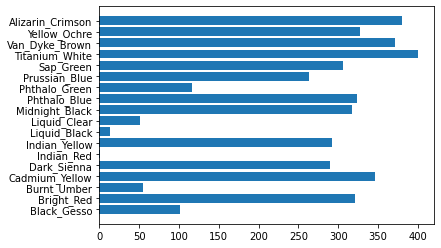

In [10]:
# Try graphing from a dict
graphing_dict = counted_colors_df.to_dict('records')[1]

# what does graphing from a dict achieve in terms of advantages?
plt.figure()
plt.barh(*zip(*graphing_dict.items()))
plt.show()

Reasons to use a dict for graphing:  
- Dicts are ordered in Python 3.7+, so the sorting will be preserve  
- A new list of color names in order would have to be created for every graph as color occurrence changes
- 1 structure of data per graph created vs 2 (1 dict vs 1 sorted values list + 1 sorted names list)

This is all based on sorting being easier and more consistent in the dataframe before graphing  
- May change if sorting in the graphing is easier

In [11]:
# get list of colors to use for plottings
test = color_df.apply(pd.Series.value_counts)
test

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,302,82,348,57,113,402,111,389,352,86,80,287,140,97,3,32,76,23
1,101,321,55,346,290,1,292,14,51,317,323,116,263,306,400,371,327,380


In [12]:
# Create small dataframe from value counts and sort based on values
sort_test = test.loc[1]
sorted_series = sort_test.sort_values(ascending=True)
sorted_series

Indian_Red            1
Liquid_Black         14
Liquid_Clear         51
Burnt_Umber          55
Black_Gesso         101
Phthalo_Green       116
Prussian_Blue       263
Dark_Sienna         290
Indian_Yellow       292
Sap_Green           306
Midnight_Black      317
Bright_Red          321
Phthalo_Blue        323
Yellow_Ochre        327
Cadmium_Yellow      346
Van_Dyke_Brown      371
Alizarin_Crimson    380
Titanium_White      400
Name: 1, dtype: int64

In [13]:
edf = test.loc[1].sort_values(ascending = True)
edf

Indian_Red            1
Liquid_Black         14
Liquid_Clear         51
Burnt_Umber          55
Black_Gesso         101
Phthalo_Green       116
Prussian_Blue       263
Dark_Sienna         290
Indian_Yellow       292
Sap_Green           306
Midnight_Black      317
Bright_Red          321
Phthalo_Blue        323
Yellow_Ochre        327
Cadmium_Yellow      346
Van_Dyke_Brown      371
Alizarin_Crimson    380
Titanium_White      400
Name: 1, dtype: int64

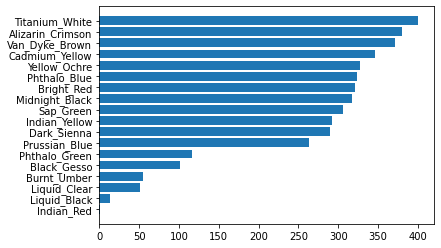

In [14]:
plt.figure()
plt.barh(sorted_series.index, sorted_series.values)
plt.show()

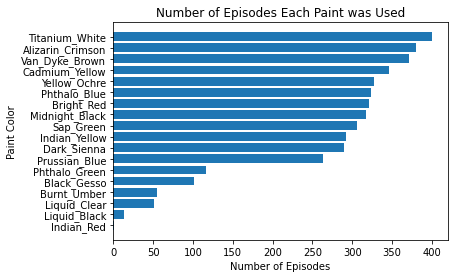

In [15]:
fig, ax = plt.subplots()

ax.barh(sorted_series.index, sorted_series.values)
ax.set_title('Number of Episodes Each Paint was Used')
ax.set_xlabel('Number of Episodes')
ax.set_ylabel('Paint Color')
plt.show()

In [21]:
# Make a function that takes in a dataf and returns a barh
def series_generator(dataf):
    '''Takes in a dataf and returns a series ready for plot'''
    #Filter data to just paint colors
    dataf = dataf[paint_colors]
    # Get value_counts of each paint
    dataf = dataf.apply(pd.Series.value_counts)
    # Sort the values
    series = dataf.loc[1].sort_values(ascending = True)
    
    return series

def barh_plotter(series):
    '''Takes in a pandas series and returns a barh chart'''
    fig, ax = plt.subplots(figsize=(12,5))

    ax.barh(series.index, series.values)
    ax.set_title('Number of Episodes Each Paint was Used')
    ax.set_xlabel('Number of Episodes')
    ax.set_ylabel('Paint Color')
    
    
    # Should this be an individual function?
    # Make Bar labels
    rects = ax.patches
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'
        # Use X value as label and format number with one decimal place
        label = "{:}".format(x_value)    

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                        # positive and negative values.
    plt.show()
    
    return fig
    
def barh_generator(dataf):
    '''Takes in a dataf and returns barh chart'''
    series = series_generator(dataf)
    barh_plotter(series)

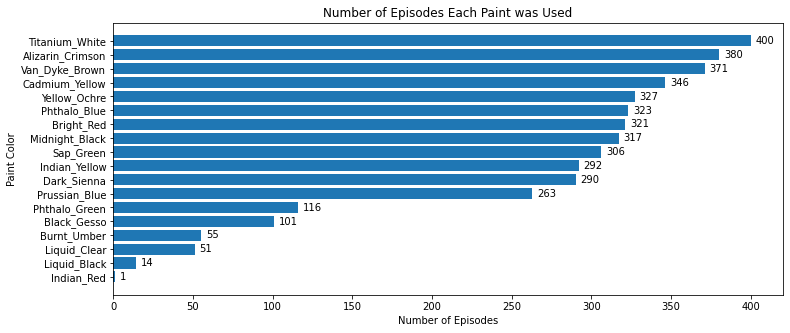

In [22]:
barh_generator(df)

In [18]:
# TODO: add count labels to each bar
# add ability to specify range or description to function like "Season 1"

In [24]:
def save_chart_img(fig, name):
    '''Takes a figure as an input and saves the figure as an image'''
    fig.savefig(f'{name}.jpg', dpi=300)